In [ ]:
pip install pybaseball

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.1/426.1 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.4/354.4 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 14.1 MB/s eta 0:00:00
  Attempting uninstall: pyjwt
    Found existing installation: PyJWT 2.3.0
    Uninstalling PyJWT-2.3.0:
      Successfully uninstalled PyJWT-2.3.0


# Clayton Kershaw

In [ ]:
from pybaseball import statcast_pitcher, playerid_lookup
import pandas as pd

def get_pitcher_data(last_name, first_name, start_year, end_year):
    # Find the player's MLBAM ID
    player_info = playerid_lookup(last_name, first_name)
    player_id = player_info.iloc[0]['key_mlbam']

    # Function to get data for multiple seasons
    def get_pitcher_data_season(player_id, year):
        data = statcast_pitcher(f"{year}-01-01", f"{year}-12-31", player_id)
        data['year'] = year
        return data

    # Get data for each year in the specified range
    all_data = [get_pitcher_data_season(player_id, year) for year in range(start_year, end_year + 1)]
    pitcher_data = pd.concat(all_data, ignore_index=True)

    return pitcher_data

# Gather Clayton Kershaw's pitching data for the desired five-year range
kershaw_data = get_pitcher_data('kershaw', 'clayton', 2019, 2023)

# Display the first few rows of the DataFrame
print("Clayton Kershaw's Pitching Data:")
print(kershaw_data.head())


Gathering player lookup table. This may take a moment.
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Clayton Kershaw's Pitching Data:
  pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
0         SL  2019-10-09           89.3           1.32           6.44   
1         FF  2019-10-09           89.4           1.27           6.47   
2         CU  2019-10-09           74.2           0.89           6.57   
3         SL  2019-10-09           88.9           1.37           6.35   
4         SL  2019-10-09           89.3           1.29           6.45   

        player_name  batter  pitcher     events      description  ...  \
0  Kershaw, Clayton  665742   477132   home_run    hit_into_play  ...   
1  Kershaw, Clayton  543685   477132   home_run    hit_into_play  ...   
2  Kershaw, Clayton  543685   477132        NaN             ball  ...   
3  Kershaw, Clayton  594809   477132  strikeout  swinging_strike  ...  

In [ ]:
# Filter by pitch type
pitch_types = ['FF', 'CU', 'SL', 'CH']
kershaw_pitch = kershaw_data[kershaw_data['pitch_type'].isin(pitch_types)]

# Define the columns to include in the subset
subset = ['pitch_type', 'game_date', 'release_speed', 'effective_speed', 'release_pos_x', 'release_pos_y', 'release_pos_z', 'pfx_x', 'pfx_z', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'release_spin_rate', 'spin_axis']

# Create the new subset by filtering the DataFrame
kershaw_filtered = kershaw_pitch[subset]

# Drop rows with missing values
kershaw_dropna = kershaw_filtered.dropna()

#final subset with primary vars of interest
new_subset = ['pitch_type', 'game_date','release_speed', 'pfx_x', 'pfx_z', 'ax', 'ay', 'release_spin_rate']
kershaw_data = kershaw_dropna[new_subset]

In [ ]:
# Check data dimensions
kershaw_data.shape

(9758, 8)

# Clayton Kershaw plots

<ipython-input-5-32d6cfbf9a54>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kershaw_data['game_date'] = pd.to_datetime(kershaw_data['game_date'])
<ipython-input-5-32d6cfbf9a54>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kershaw_data['year'] = kershaw_data['game_date'].dt.year


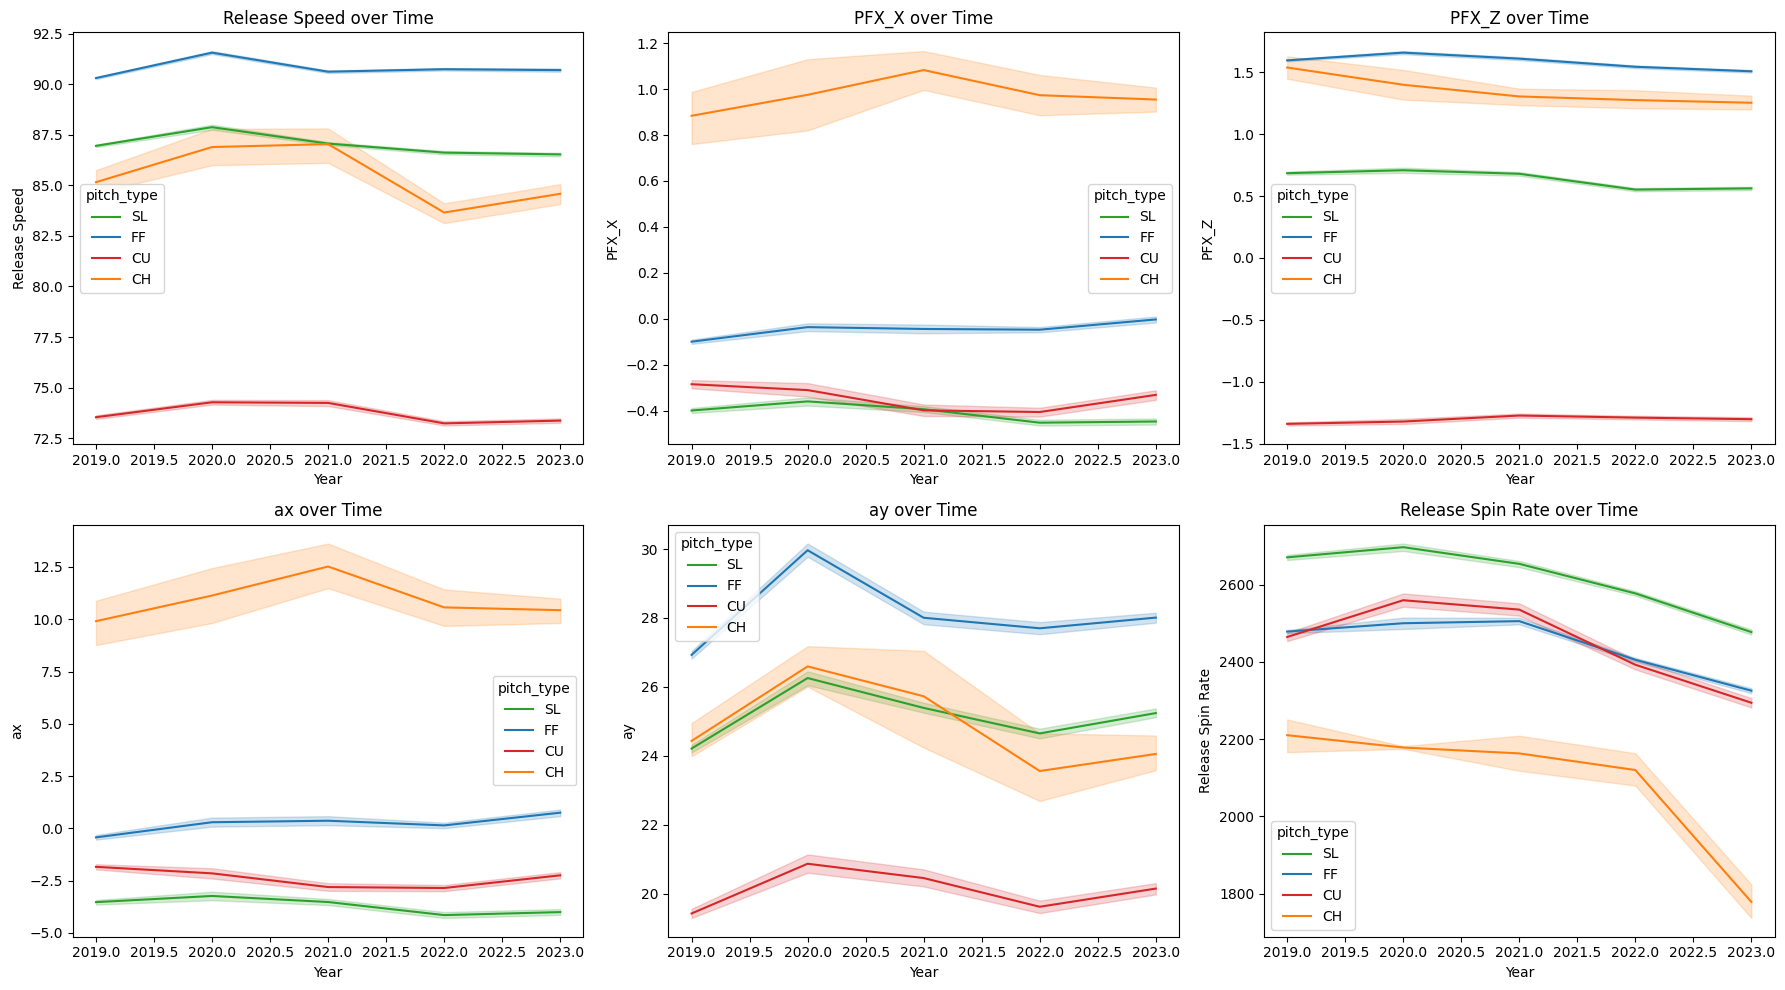

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Convert game_date to datetime
kershaw_data['game_date'] = pd.to_datetime(kershaw_data['game_date'])

# Extract year and month
kershaw_data['year'] = kershaw_data['game_date'].dt.year

# Create a custom color palette for the pitch types
pitch_palette = {
    'FF': '#1f77b4',  # Blue
    'CH': '#ff7f0e',  # Orange
    'SL': '#2ca02c',  # Green
    'CU': '#d62728'   # Red
}

# Create a 2x3 grid for subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Line plot for Release Speed over Time
sns.lineplot(data=kershaw_data, x='year', y='release_speed', hue='pitch_type', ax=axes[0, 0], palette=pitch_palette)
axes[0, 0].set_title('Release Speed over Time')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Release Speed')

# Line plot for PFX_X over Time
sns.lineplot(data=kershaw_data, x='year', y='pfx_x', hue='pitch_type', ax=axes[0, 1], palette=pitch_palette)
axes[0, 1].set_title('PFX_X over Time')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('PFX_X')

# Line plot for PFX_Z over Time
sns.lineplot(data=kershaw_data, x='year', y='pfx_z', hue='pitch_type', ax=axes[0, 2],palette=pitch_palette)
axes[0, 2].set_title('PFX_Z over Time')
axes[0, 2].set_xlabel('Year')
axes[0, 2].set_ylabel('PFX_Z')

# Line plot for ax over Time
sns.lineplot(data=kershaw_data, x='year', y='ax', hue='pitch_type', ax=axes[1, 0],palette=pitch_palette)
axes[1, 0].set_title('ax over Time')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('ax')

# Line plot for ay over Time
sns.lineplot(data=kershaw_data, x='year', y='ay', hue='pitch_type', ax=axes[1, 1],palette=pitch_palette)
axes[1, 1].set_title('ay over Time')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('ay')

# Line plot for Release Spin Rate over Time
sns.lineplot(data=kershaw_data, x='year', y='release_spin_rate', hue='pitch_type', ax=axes[1, 2],palette=pitch_palette)
axes[1, 2].set_title('Release Spin Rate over Time')
axes[1, 2].set_xlabel('Year')
axes[1, 2].set_ylabel('Release Spin Rate')

# Adjust layout
plt.tight_layout()
plt.show()

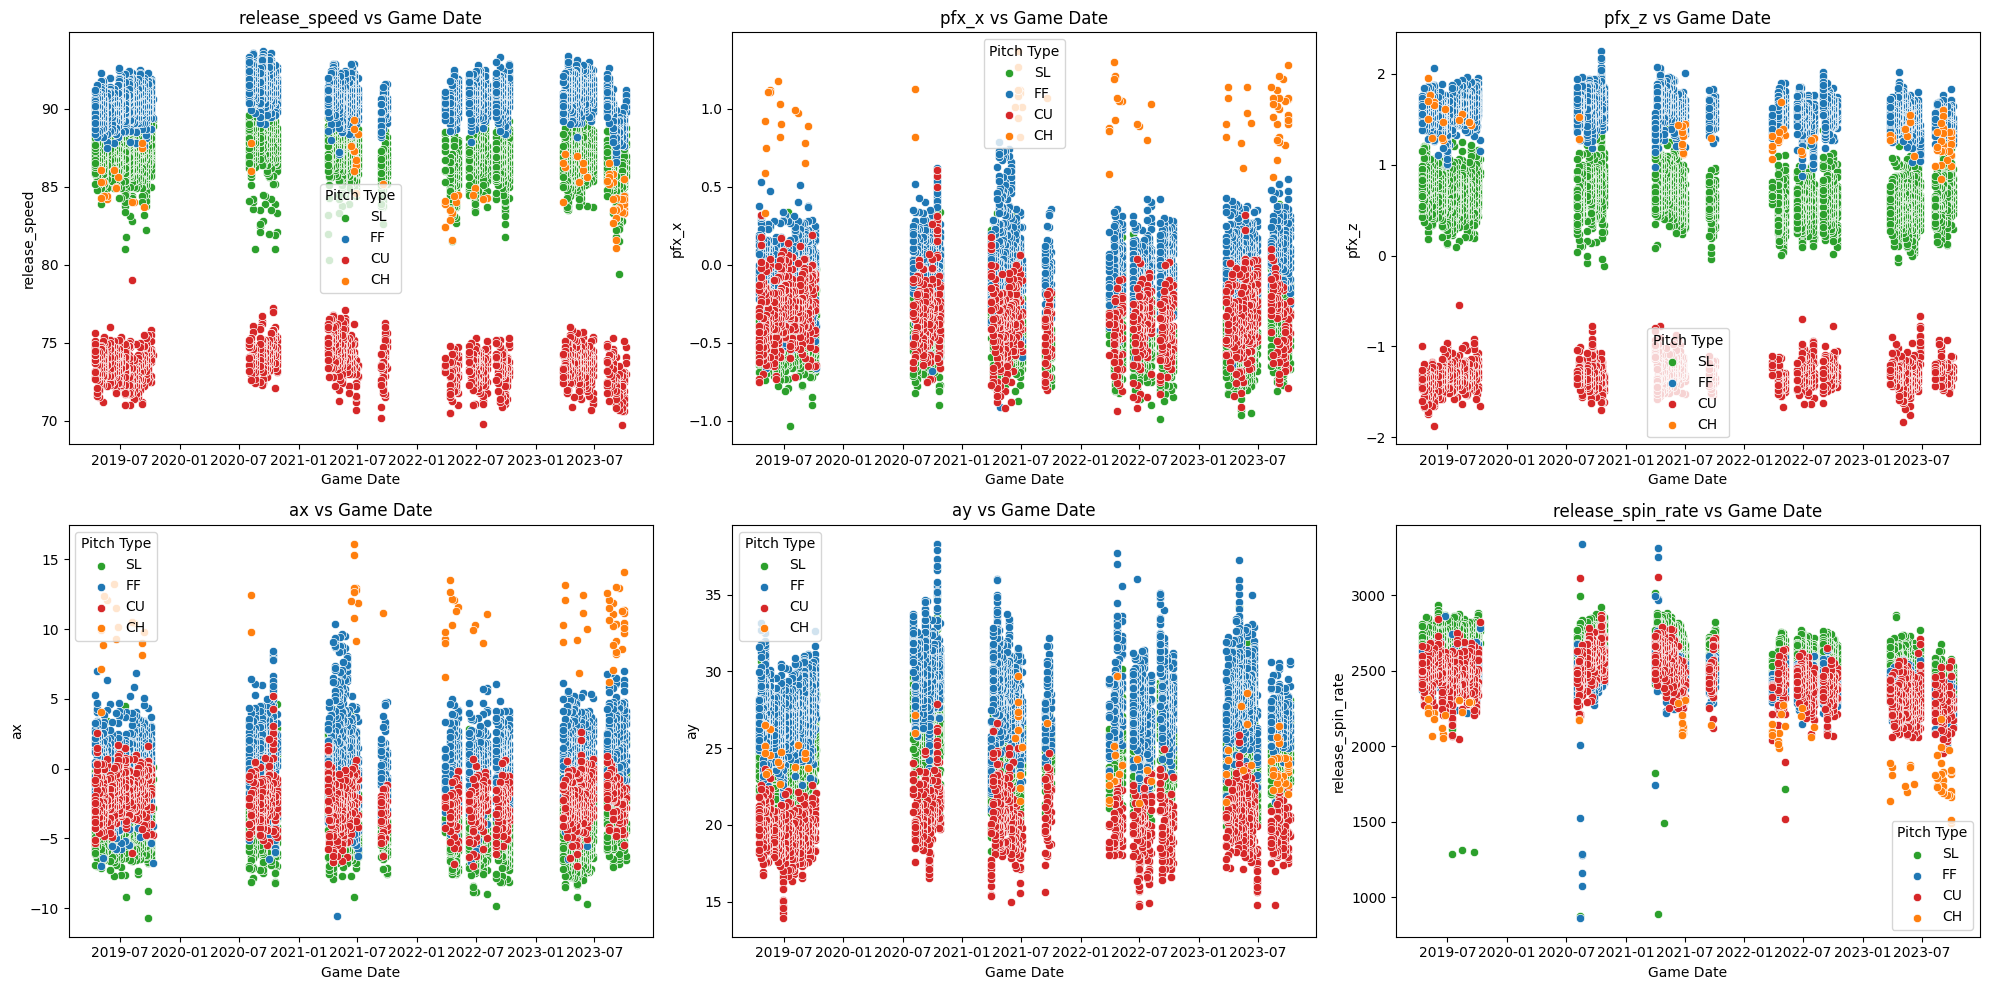

In [ ]:
# Define the list of variables
variables = ['release_speed', 'pfx_x', 'pfx_z', 'ax', 'ay', 'release_spin_rate']

# Custom color palette for each pitch type
pitch_palette = {
    'FF': '#1f77b4',  # Blue
    'CH': '#ff7f0e',  # Orange
    'SL': '#2ca02c',  # Green
    'CU': '#d62728'   # Red
}

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each variable and create scatter plots
for i, var in enumerate(variables):
    # Scatter plot for the current variable
    for idx, pitch_type in enumerate(kershaw_data['pitch_type'].unique()):
        data_filtered = kershaw_data[kershaw_data['pitch_type'] == pitch_type]
        sns.scatterplot(data=data_filtered, x='game_date', y=var, ax=axes[i], color=pitch_palette[pitch_type], label=pitch_type)
    axes[i].set_title(f'{var} vs Game Date')
    axes[i].set_xlabel('Game Date')
    axes[i].set_ylabel(var)
    axes[i].legend(title='Pitch Type')

# Adjust layout
plt.tight_layout()
plt.show()


<ipython-input-7-c2998a86f1ae>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=var_data, x='game_date', y=var, hue='year', estimator='mean', ci=None, lw=2, palette='bright')


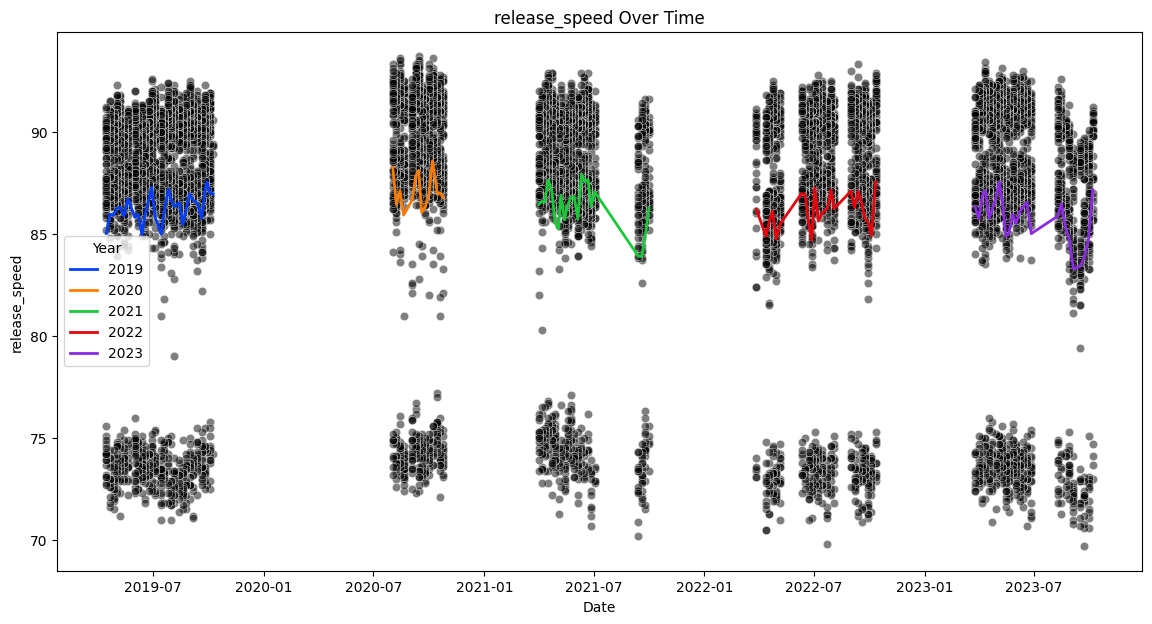

<ipython-input-7-c2998a86f1ae>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=var_data, x='game_date', y=var, hue='year', estimator='mean', ci=None, lw=2, palette='bright')


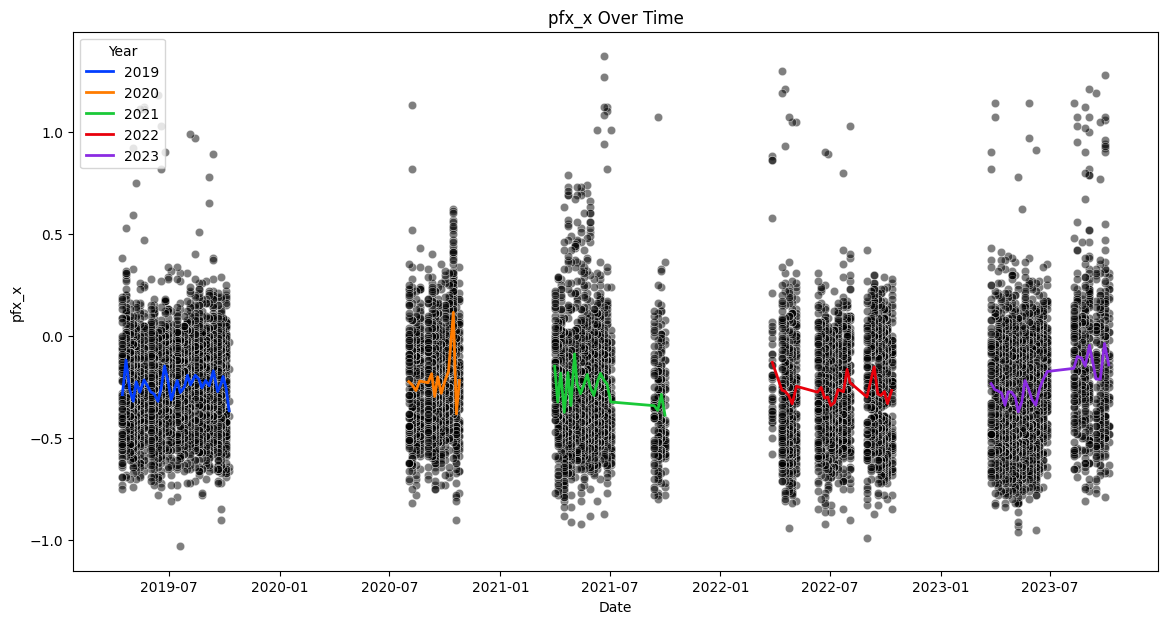

<ipython-input-7-c2998a86f1ae>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=var_data, x='game_date', y=var, hue='year', estimator='mean', ci=None, lw=2, palette='bright')


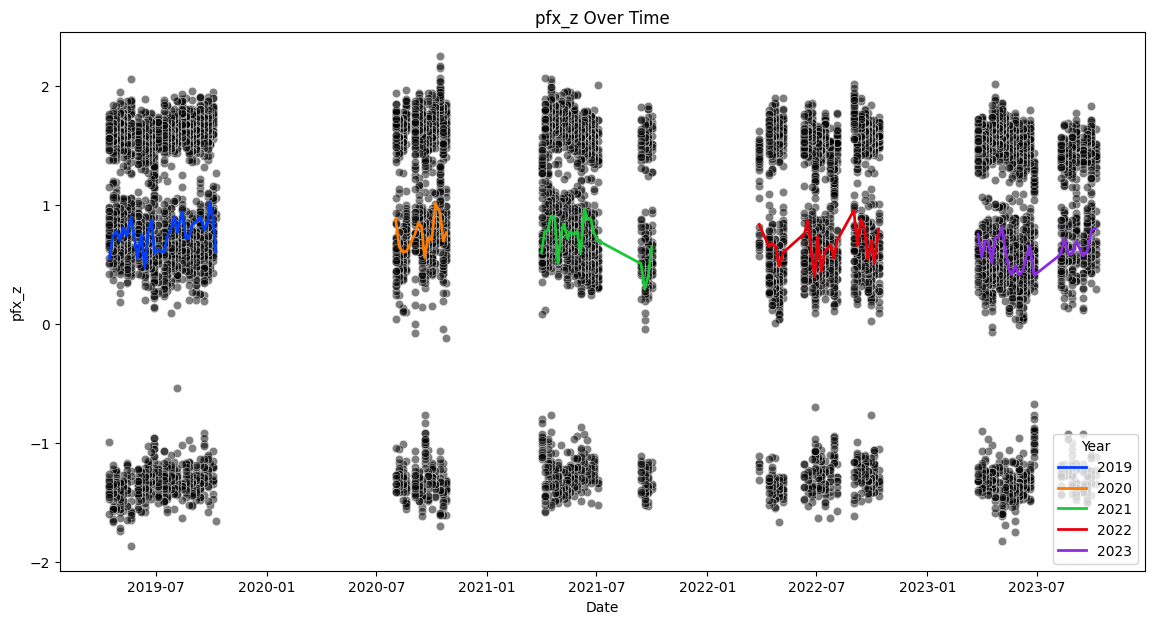

<ipython-input-7-c2998a86f1ae>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=var_data, x='game_date', y=var, hue='year', estimator='mean', ci=None, lw=2, palette='bright')


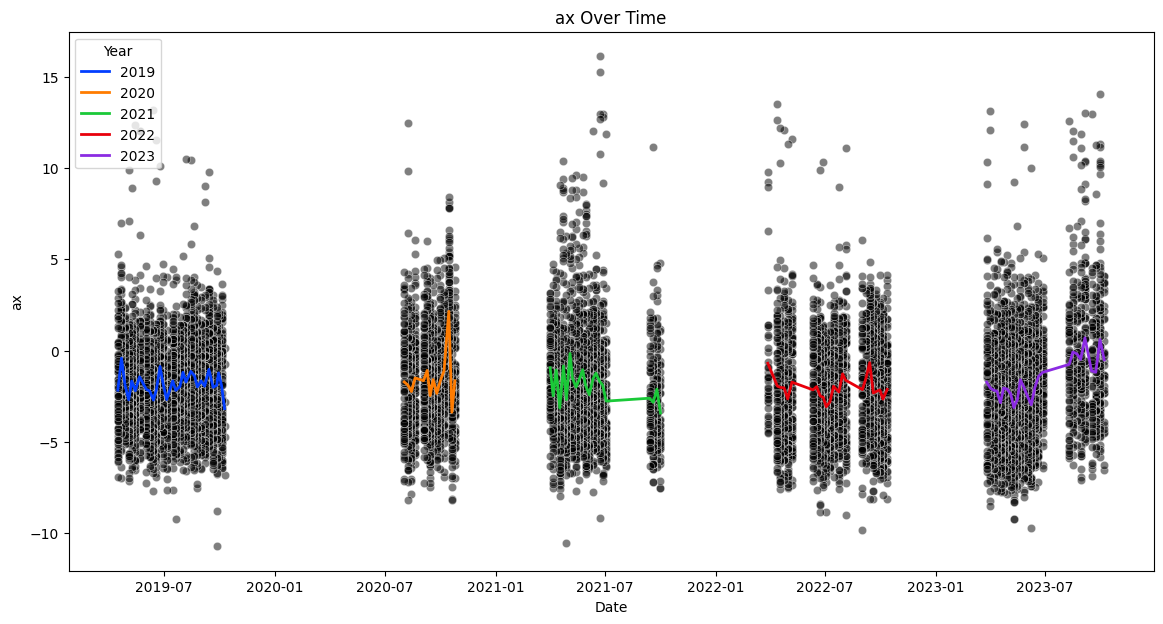

<ipython-input-7-c2998a86f1ae>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=var_data, x='game_date', y=var, hue='year', estimator='mean', ci=None, lw=2, palette='bright')


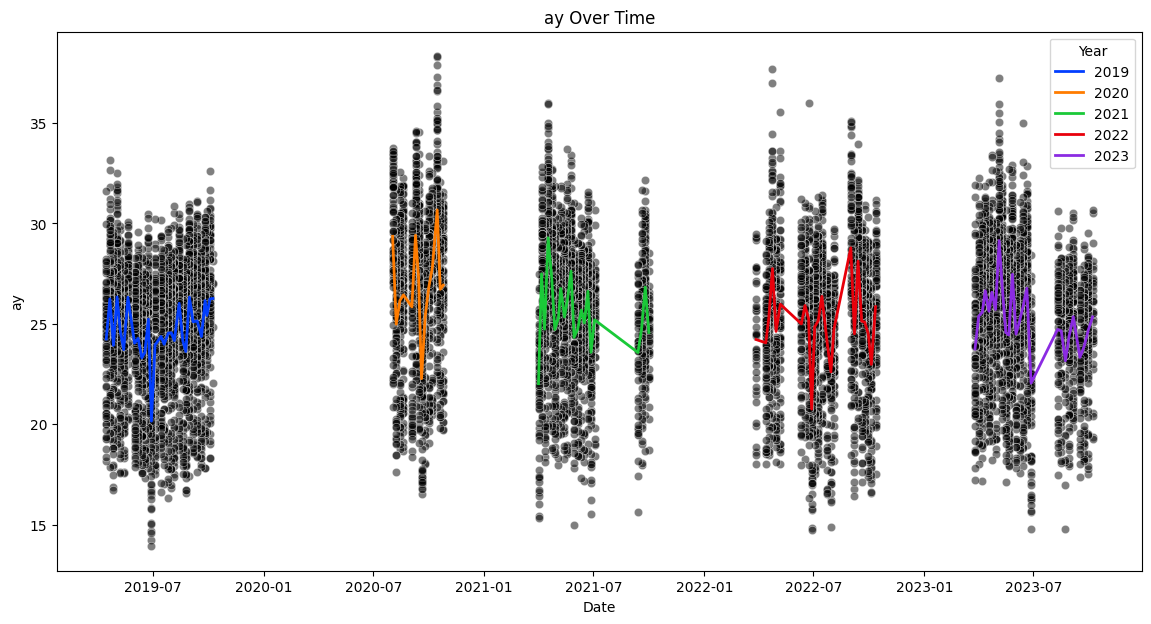

<ipython-input-7-c2998a86f1ae>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=var_data, x='game_date', y=var, hue='year', estimator='mean', ci=None, lw=2, palette='bright')


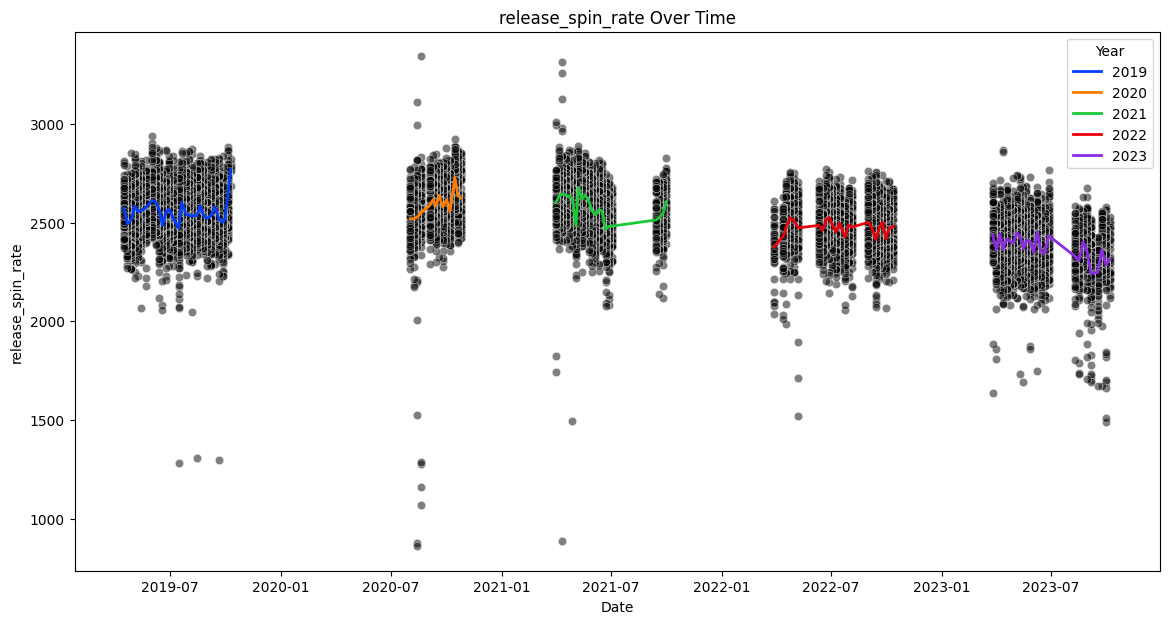

In [ ]:
# Loop over each variable
for var in variables:
    # Filter data for the current variable
    var_data = kershaw_data[['game_date', var, 'year']]

    # Plot scatterplot with all points black
    plt.figure(figsize=(14, 7))
    sns.scatterplot(data=var_data, x='game_date', y=var, color='black', alpha=0.5)

    # Plot lineplot for average value per year with a brighter color scheme
    sns.lineplot(data=var_data, x='game_date', y=var, hue='year', estimator='mean', ci=None, lw=2, palette='bright')

    # Set title and labels
    plt.title(f'{var} Over Time')
    plt.xlabel('Date')
    plt.ylabel(var)
    plt.legend(title='Year')
    plt.show()


In [ ]:
# plot pfx_x and pfx_z against each other, for years 2019-2023
years = [2019,2020,2021,2022,2023]

num_cols = 3
num_rows = (len(years) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axes = axes.flatten()

for i, year in enumerate(years):
    ax = axes[i]
    data = kershaw_data[kershaw_data['year'] == year]
    sns.scatterplot(data = data, x= 'pfx_x', y = 'pfx_z', hue='pitch_type',
                    hue_order=['FF','SL','CU','CH',], ax=ax)
    ax.set_title('PFX_X and PFX_Z in '+str(year))
    ax.set(xlim=(-2, 2), ylim=(-2, 2.5))
plt.tight_layout()
plt.show()

In [ ]:
# plot ax and ay against each other, for years 2019-2023
years = [2019,2020,2021,2022,2023]

num_cols = 3
num_rows = (len(years) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axes = axes.flatten()

for i, year in enumerate(years):
    ax = axes[i]
    data = kershaw_data[kershaw_data['year'] == year]
    sns.scatterplot(data = data, x= 'ax', y = 'ay', hue='pitch_type',
                    hue_order=['FF','SL','CU','CH',], ax=ax)
    ax.set_title('ax and ay in '+str(year))
    ax.set(xlim=(-25, 15), ylim=(0, 50))
plt.tight_layout()
plt.show()

# Max Fried

In [ ]:
from pybaseball import statcast_pitcher, playerid_lookup
import pandas as pd

def get_pitcher_data(last_name, first_name, start_year, end_year):
    # Find the player's MLBAM ID
    player_info = playerid_lookup(last_name, first_name)
    player_id = player_info.iloc[0]['key_mlbam']

    # Function to get data for multiple seasons
    def get_pitcher_data_season(player_id, year):
        data = statcast_pitcher(f"{year}-01-01", f"{year}-12-31", player_id)
        data['year'] = year
        return data

    # Get data for each year in the specified range
    all_data = [get_pitcher_data_season(player_id, year) for year in range(start_year, end_year + 1)]
    pitcher_data = pd.concat(all_data, ignore_index=True)

    return pitcher_data

# Gather max fried's pitching data for the desired five-year range
fried_data = get_pitcher_data('fried', 'max', 2019, 2023)

# Display the first few rows of the DataFrame
print("Max Fried's Pitching Data:")
print(fried_data.head())


Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Max Fried's Pitching Data:
  pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
0         CU  2019-10-09           74.3           1.31           5.99   
1         FF  2019-10-09           93.5           1.15           5.95   
2         FF  2019-10-09           95.3           0.90           6.12   
3         CU  2019-10-09           75.3           1.05           6.04   
4         SL  2019-10-09           84.3           1.51           5.88   

  player_name  batter  pitcher     events    description  ...  post_bat_score  \
0  Fried, Max  451594   608331  field_out  hit_into_play  ...              11   
1  Fried, Max  451594   608331        NaN           ball  ...              11   
2  Fried, Max  451594   608331        NaN           foul  ...              11   
3  Fried, Max  656427   608331  strikeout  called_strike  ...              11   
4  Fried, Max  6564

In [ ]:
# Filter by pitch type
pitch_types = ['FF', 'CU', 'SL', 'CH']
fried_pitch = fried_data[fried_data['pitch_type'].isin(pitch_types)]

# Define the columns to include in the subset
subset = ['pitch_type', 'game_date', 'release_speed', 'effective_speed', 'release_pos_x', 'release_pos_y', 'release_pos_z', 'pfx_x', 'pfx_z', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'release_spin_rate', 'spin_axis']

# Create the new subset by filtering the DataFrame
fried_filtered = fried_pitch[subset]

# Drop rows with missing values
fried_dropna = fried_filtered.dropna()

#final subset with primary vars of interest
new_subset = ['pitch_type', 'game_date','release_speed', 'pfx_x', 'pfx_z', 'ax', 'ay', 'release_spin_rate']
fried_data = fried_dropna[new_subset]

In [ ]:
# Check data dimensions
fried_data.shape

(10067, 8)

# Max Fried Plots

<ipython-input-13-d59065fb1d70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fried_data['game_date'] = pd.to_datetime(fried_data['game_date'])
<ipython-input-13-d59065fb1d70>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fried_data['year'] = fried_data['game_date'].dt.year


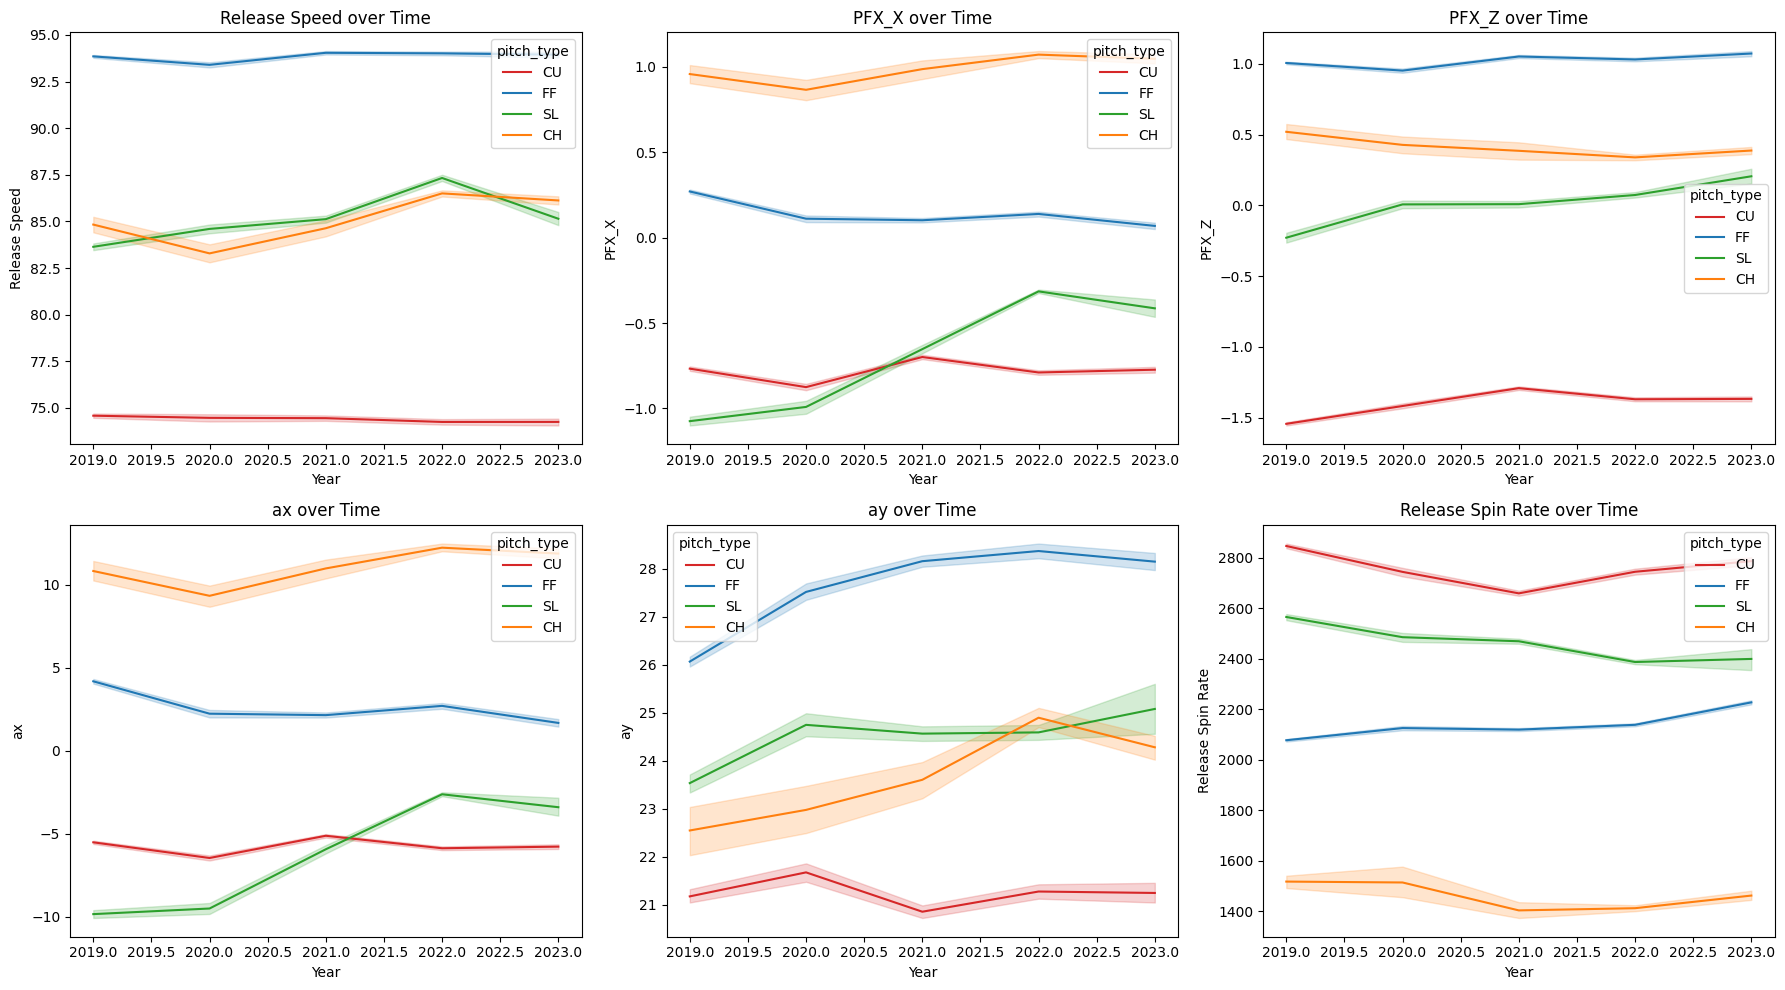

In [ ]:
# Convert game_date to datetime
fried_data['game_date'] = pd.to_datetime(fried_data['game_date'])

# Extract year and month
fried_data['year'] = fried_data['game_date'].dt.year

# Create a custom color palette for the pitch types
pitch_palette = {
    'FF': '#1f77b4',  # Blue
    'CH': '#ff7f0e',  # Orange
    'SL': '#2ca02c',  # Green
    'CU': '#d62728'   # Red
}

# Create a 2x3 grid for subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Line plot for Release Speed over Time
sns.lineplot(data=fried_data, x='year', y='release_speed', hue='pitch_type', ax=axes[0, 0], palette=pitch_palette)
axes[0, 0].set_title('Release Speed over Time')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Release Speed')

# Line plot for PFX_X over Time
sns.lineplot(data=fried_data, x='year', y='pfx_x', hue='pitch_type', ax=axes[0, 1],palette=pitch_palette)
axes[0, 1].set_title('PFX_X over Time')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('PFX_X')

# Line plot for PFX_Z over Time
sns.lineplot(data=fried_data, x='year', y='pfx_z', hue='pitch_type', ax=axes[0, 2],palette=pitch_palette)
axes[0, 2].set_title('PFX_Z over Time')
axes[0, 2].set_xlabel('Year')
axes[0, 2].set_ylabel('PFX_Z')

# Line plot for ax over Time
sns.lineplot(data=fried_data, x='year', y='ax', hue='pitch_type', ax=axes[1, 0],palette=pitch_palette)
axes[1, 0].set_title('ax over Time')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('ax')

# Line plot for ay over Time
sns.lineplot(data=fried_data, x='year', y='ay', hue='pitch_type', ax=axes[1, 1],palette=pitch_palette)
axes[1, 1].set_title('ay over Time')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('ay')

# Line plot for Release Spin Rate over Time
sns.lineplot(data=fried_data, x='year', y='release_spin_rate', hue='pitch_type', ax=axes[1, 2],palette=pitch_palette)
axes[1, 2].set_title('Release Spin Rate over Time')
axes[1, 2].set_xlabel('Year')
axes[1, 2].set_ylabel('Release Spin Rate')

# Adjust layout
plt.tight_layout()
plt.show()


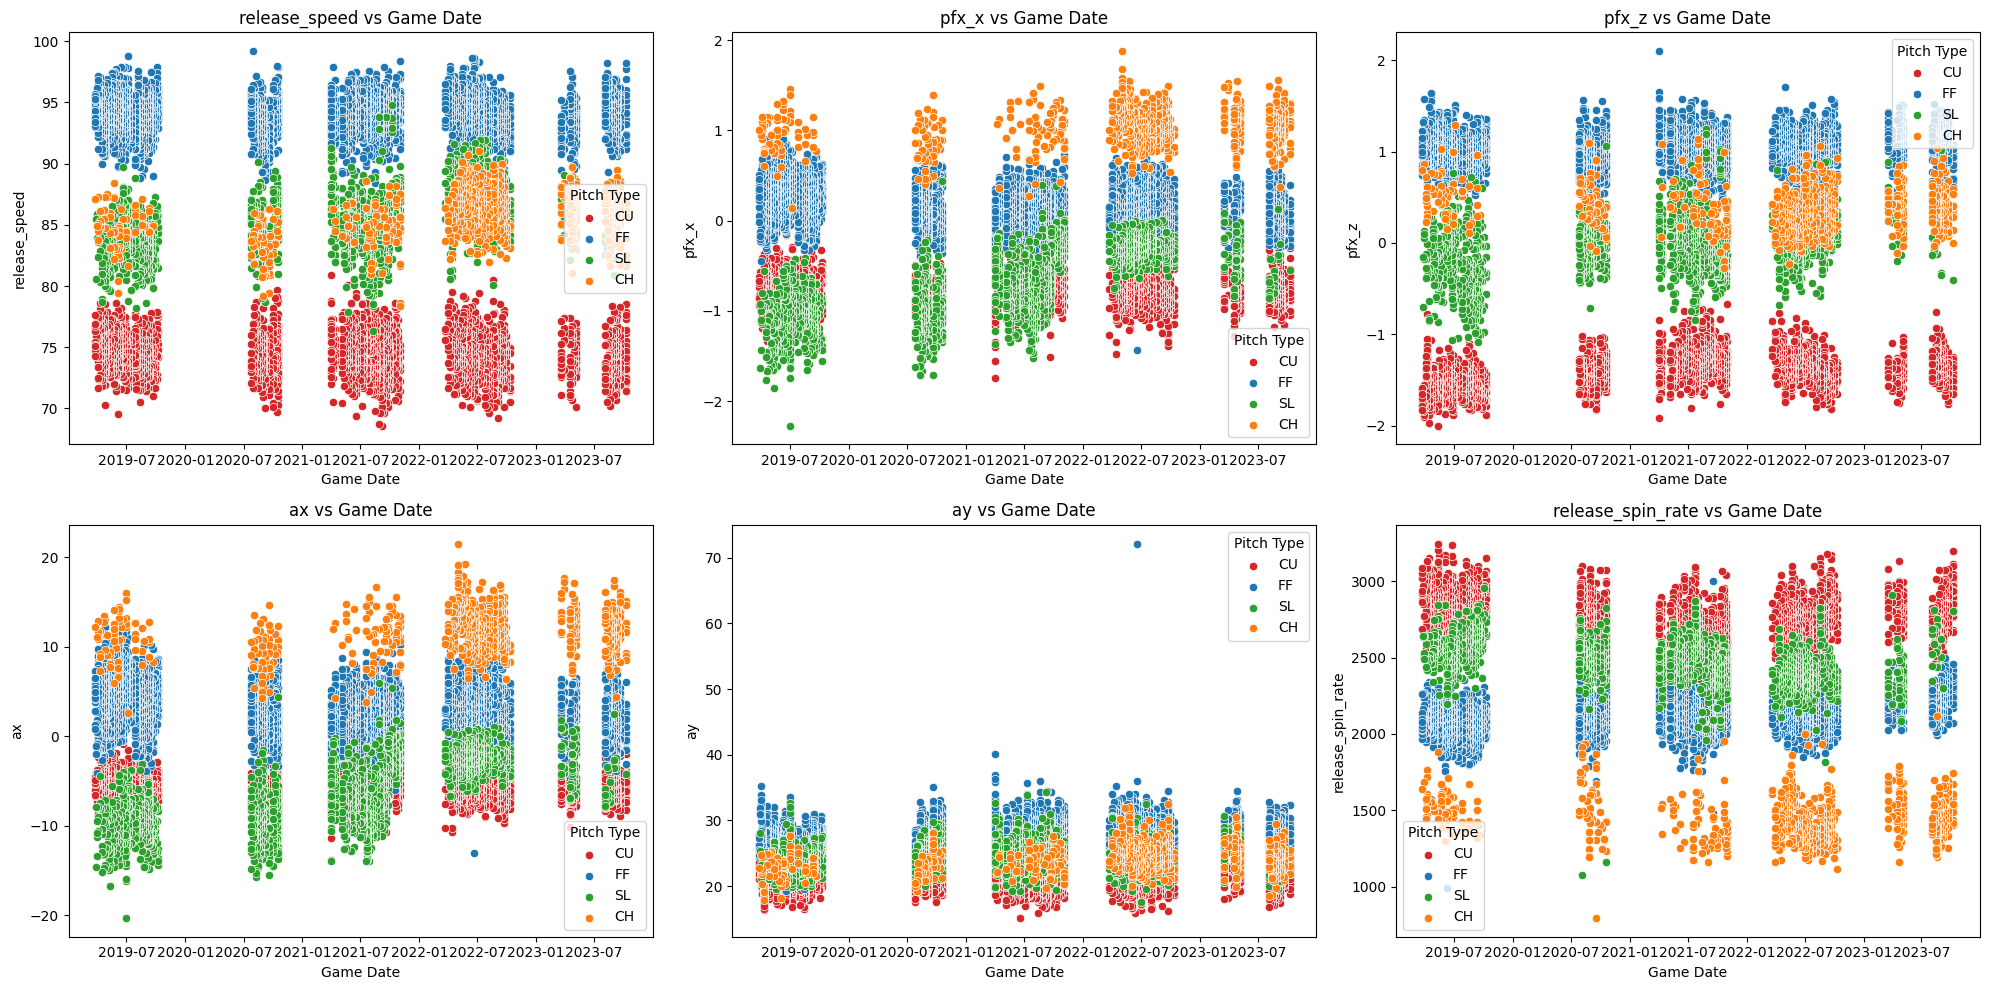

In [ ]:
# Define the list of variables
variables = ['release_speed', 'pfx_x', 'pfx_z', 'ax', 'ay', 'release_spin_rate']

# Create a custom color palette for the pitch types
pitch_palette = {
    'FF': '#1f77b4',  # Blue
    'CH': '#ff7f0e',  # Orange
    'SL': '#2ca02c',  # Green
    'CU': '#d62728'   # Red
}

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each variable and create scatter plots
for i, var in enumerate(variables):
    # Scatter plot for the current variable
    for idx, pitch_type in enumerate(fried_data['pitch_type'].unique()):
        data_filtered = fried_data[fried_data['pitch_type'] == pitch_type]
        sns.scatterplot(data=data_filtered, x='game_date', y=var, ax=axes[i], color=pitch_palette[pitch_type], label=pitch_type)
    axes[i].set_title(f'{var} vs Game Date')
    axes[i].set_xlabel('Game Date')
    axes[i].set_ylabel(var)
    axes[i].legend(title='Pitch Type')

# Adjust layout
plt.tight_layout()
plt.show()


<ipython-input-15-e4a35fbcf6b3>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=var_data, x='game_date', y=var, hue='year', estimator='mean', ci=None, lw=2, palette='bright')


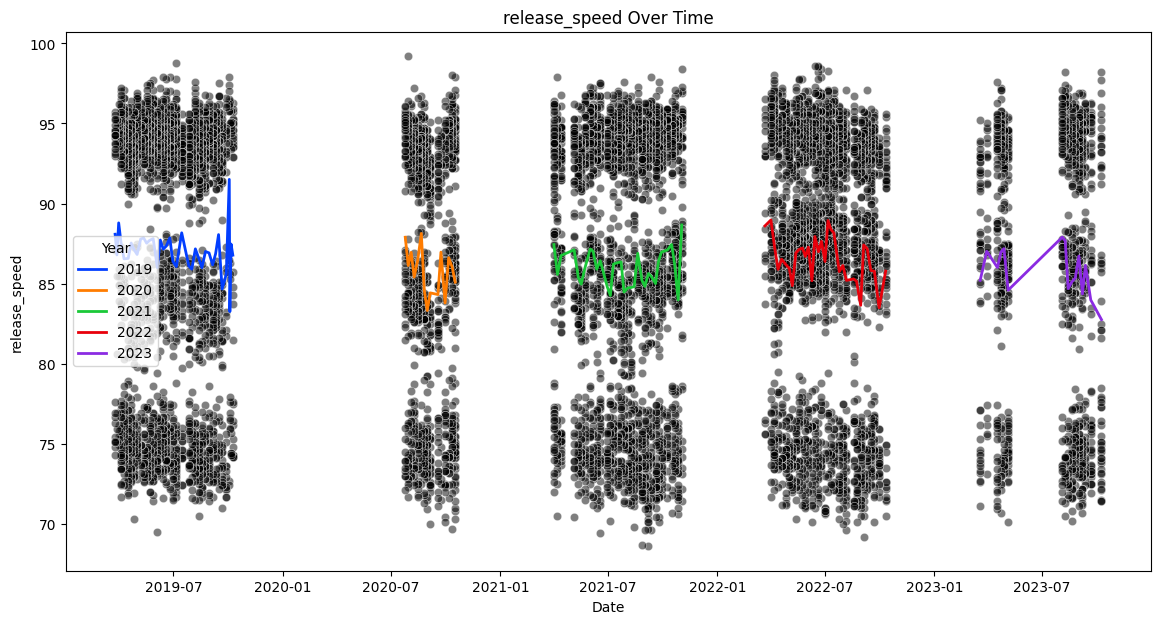

<ipython-input-15-e4a35fbcf6b3>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=var_data, x='game_date', y=var, hue='year', estimator='mean', ci=None, lw=2, palette='bright')


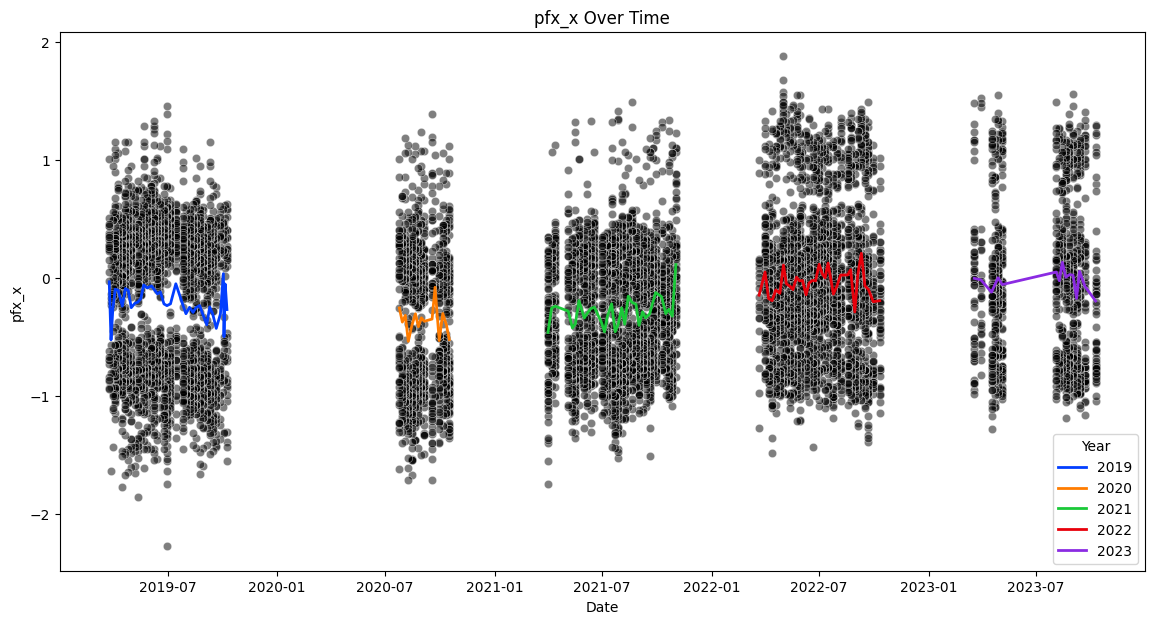

<ipython-input-15-e4a35fbcf6b3>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=var_data, x='game_date', y=var, hue='year', estimator='mean', ci=None, lw=2, palette='bright')


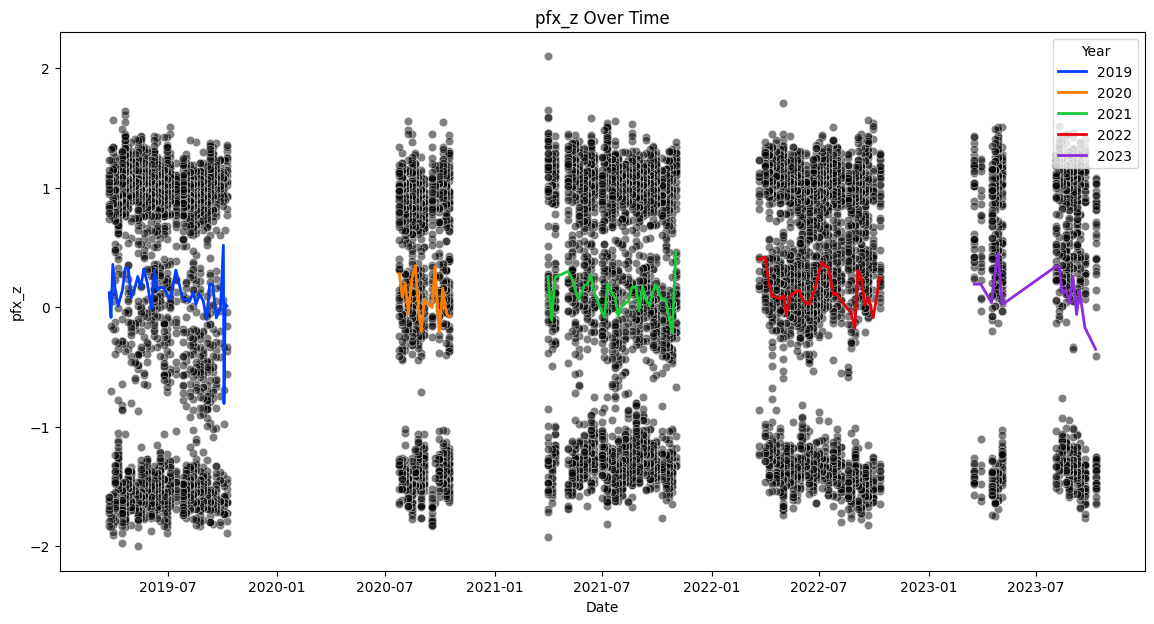

<ipython-input-15-e4a35fbcf6b3>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=var_data, x='game_date', y=var, hue='year', estimator='mean', ci=None, lw=2, palette='bright')


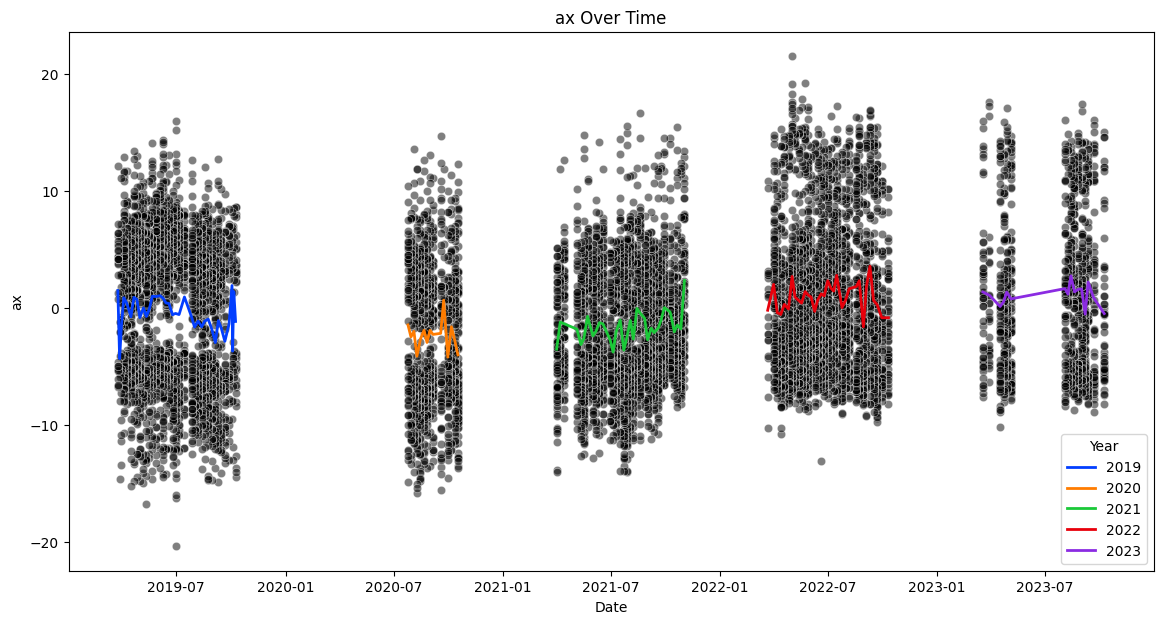

<ipython-input-15-e4a35fbcf6b3>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=var_data, x='game_date', y=var, hue='year', estimator='mean', ci=None, lw=2, palette='bright')


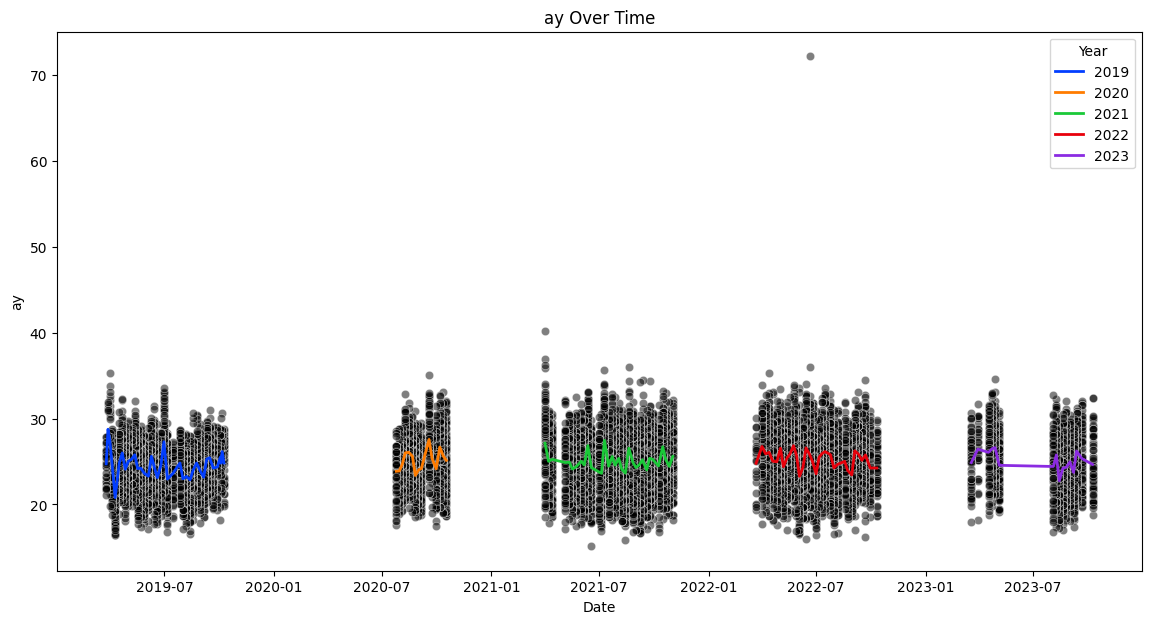

<ipython-input-15-e4a35fbcf6b3>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=var_data, x='game_date', y=var, hue='year', estimator='mean', ci=None, lw=2, palette='bright')


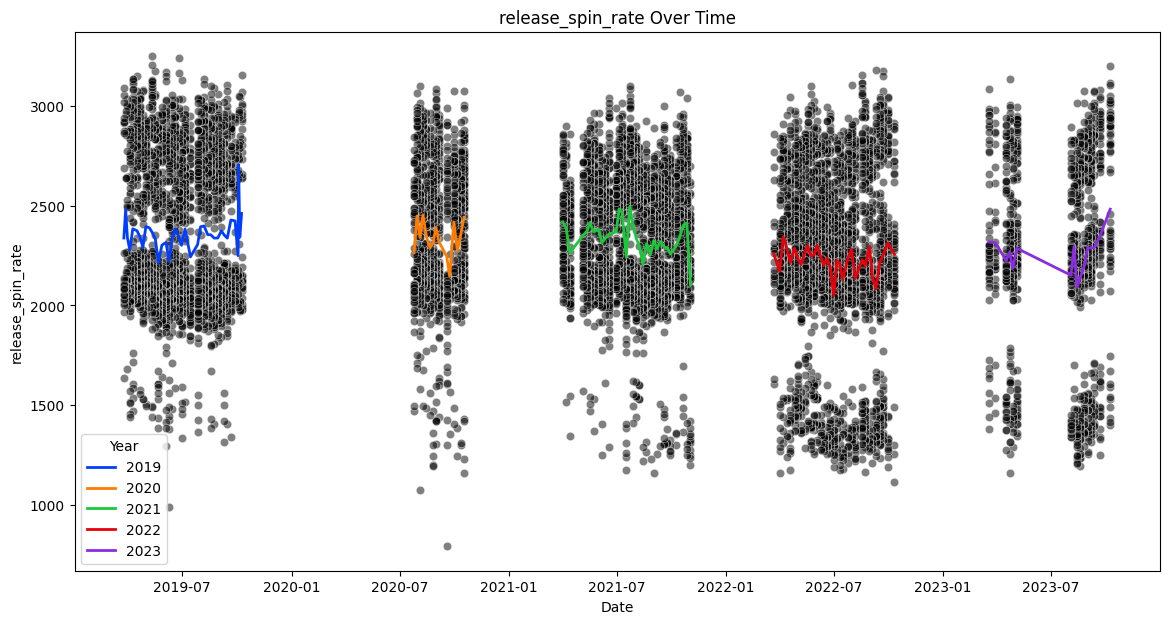

In [ ]:
# Loop over each variable
for var in variables:
    # Filter data for the current variable
    var_data = fried_data[['game_date', var, 'year']]

    # Plot scatterplot with all points black
    plt.figure(figsize=(14, 7))
    sns.scatterplot(data=var_data, x='game_date', y=var, color='black', alpha=0.5)

    # Plot lineplot for average value per year with a brighter color scheme
    sns.lineplot(data=var_data, x='game_date', y=var, hue='year', estimator='mean', ci=None, lw=2, palette='bright')

    # Set title and labels
    plt.title(f'{var} Over Time')
    plt.xlabel('Date')
    plt.ylabel(var)
    plt.legend(title='Year')
    plt.show()


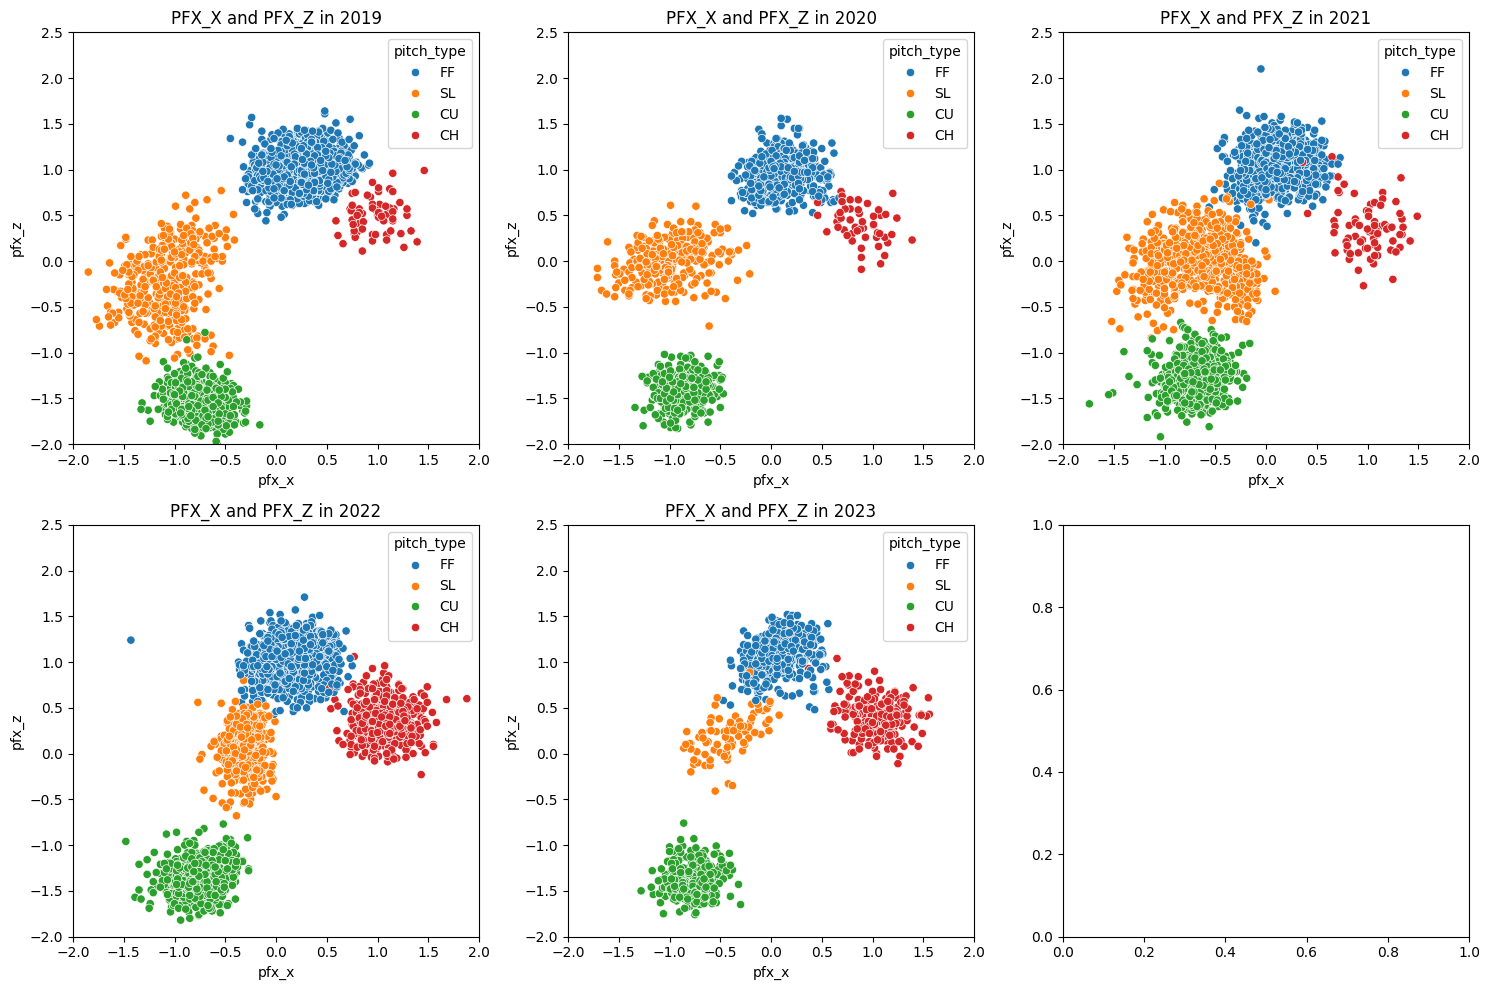

In [ ]:
# plot pfx_x and pfx_z against each other, for years 2019-2023
years = [2019,2020,2021,2022,2023]

num_cols = 3
num_rows = (len(years) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axes = axes.flatten()

for i, year in enumerate(years):
    ax = axes[i]
    data = fried_data[fried_data['year'] == year]
    sns.scatterplot(data = data, x= 'pfx_x', y = 'pfx_z', hue='pitch_type',
                    hue_order=['FF','SL','CU','CH',], ax=ax)
    ax.set_title('PFX_X and PFX_Z in '+str(year))
    ax.set(xlim=(-2, 2), ylim=(-2, 2.5))
plt.tight_layout()
plt.show()

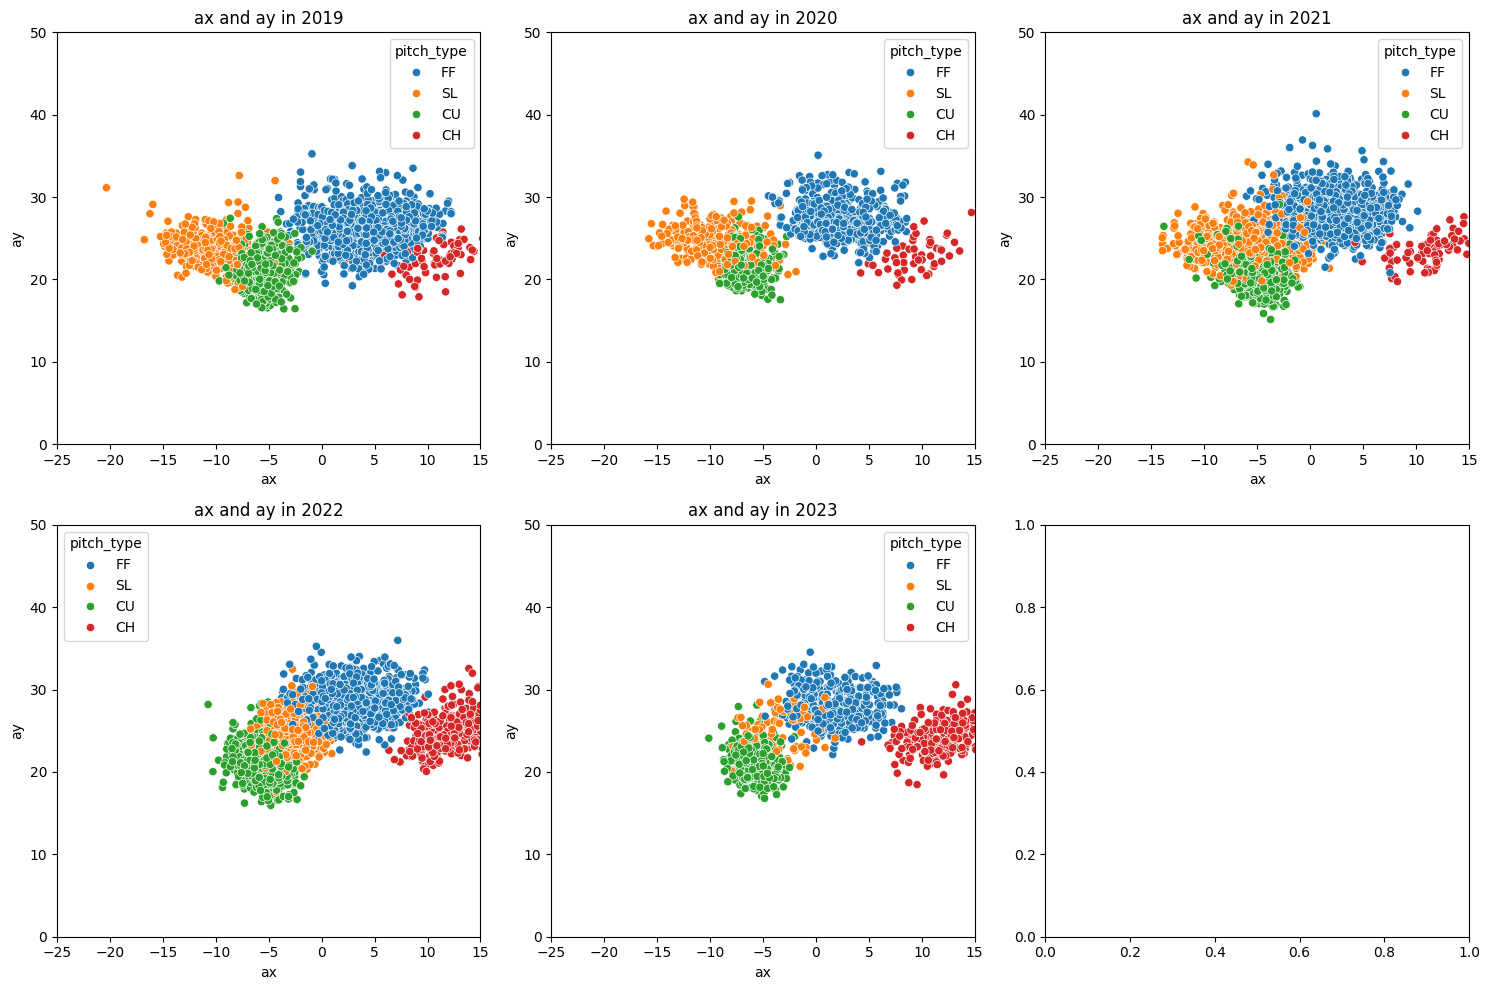

In [ ]:
# plot ax and ay against each other, for years 2019-2023
years = [2019,2020,2021,2022,2023]

num_cols = 3
num_rows = (len(years) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axes = axes.flatten()

for i, year in enumerate(years):
    ax = axes[i]
    data = fried_data[fried_data['year'] == year]
    sns.scatterplot(data = data, x= 'ax', y = 'ay', hue='pitch_type',
                    hue_order=['FF','SL','CU','CH',], ax=ax)
    ax.set_title('ax and ay in '+str(year))
    ax.set(xlim=(-25, 15), ylim=(0, 50))
plt.tight_layout()
plt.show()

# Comparison plots

<ipython-input-9-9b85370a787e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fried_data['game_date'] = pd.to_datetime(fried_data['game_date'])
<ipython-input-9-9b85370a787e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kershaw_data['game_date'] = pd.to_datetime(kershaw_data['game_date'])
<ipython-input-9-9b85370a787e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

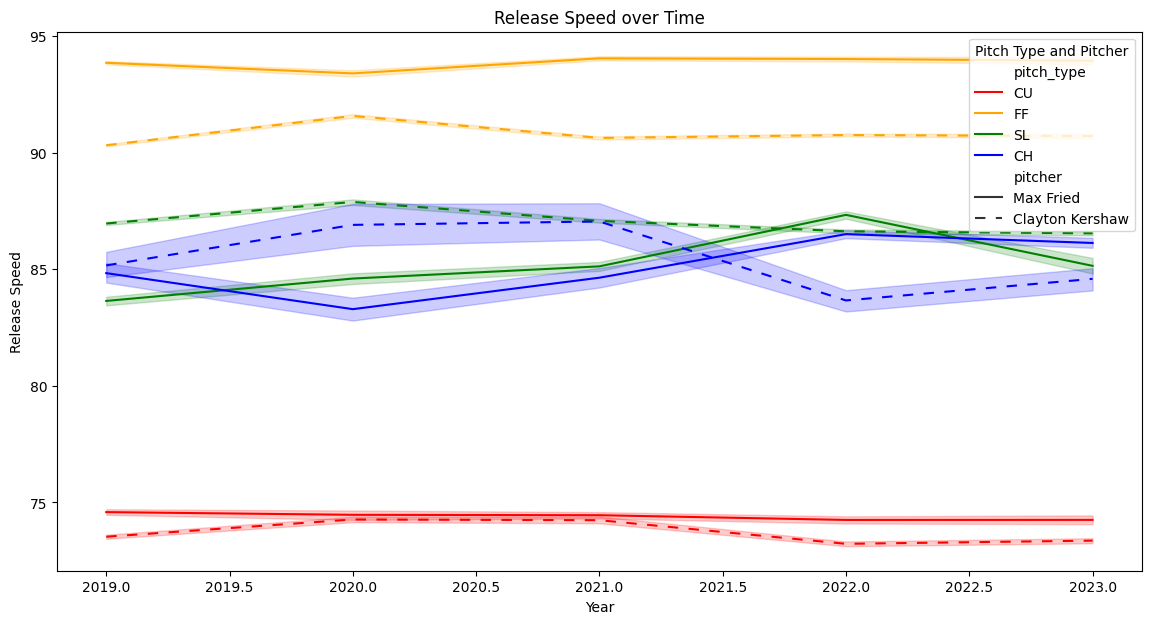

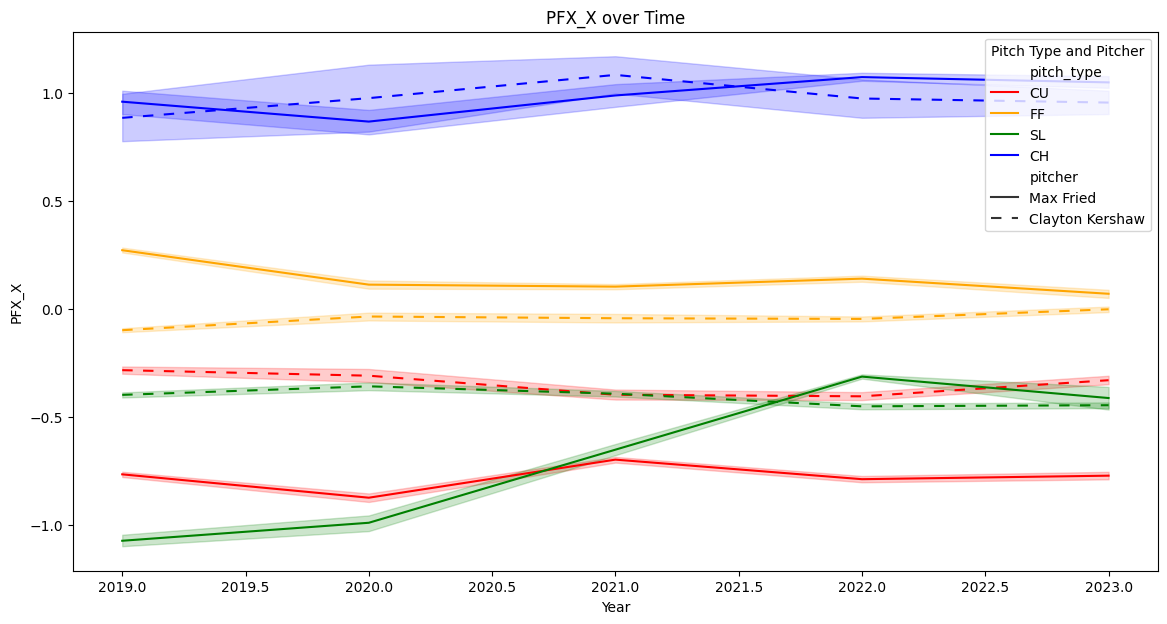

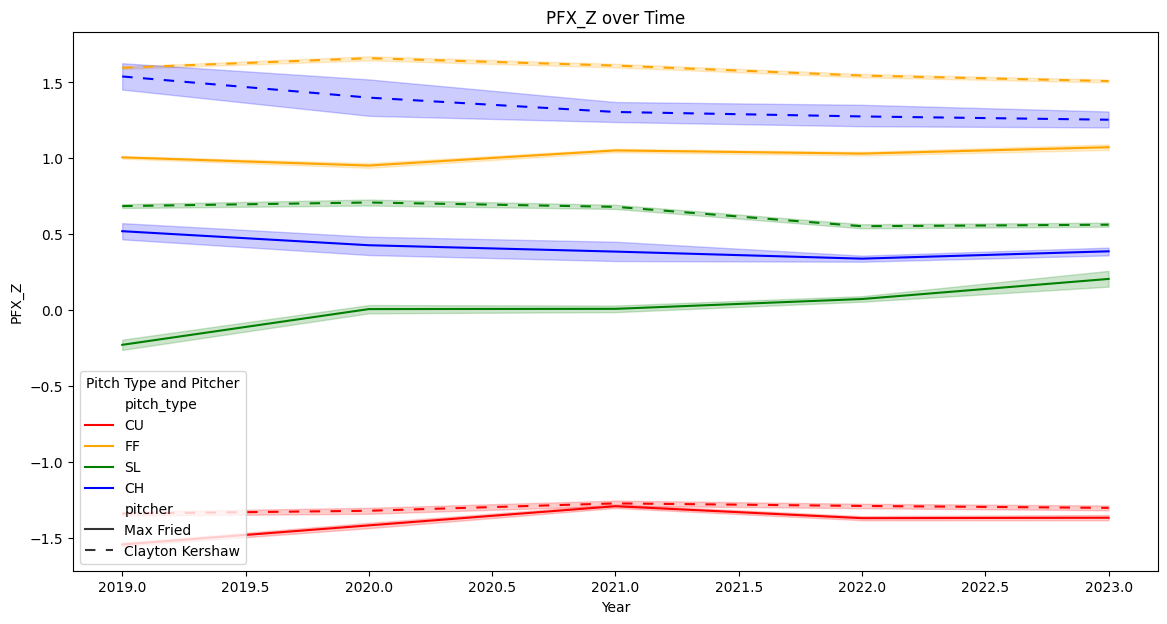

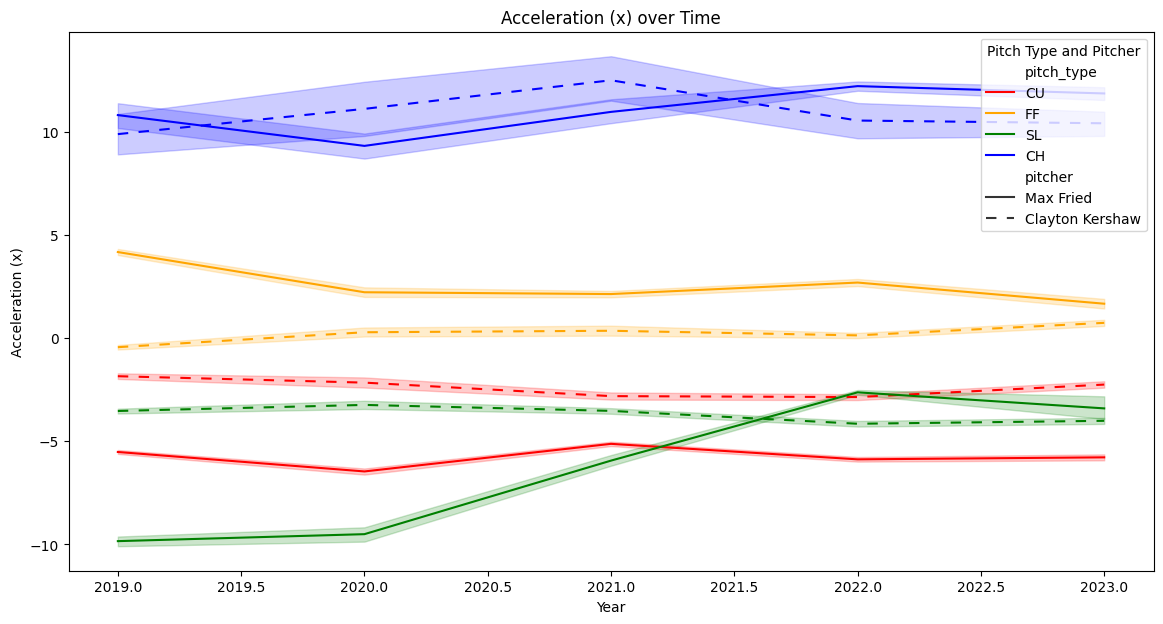

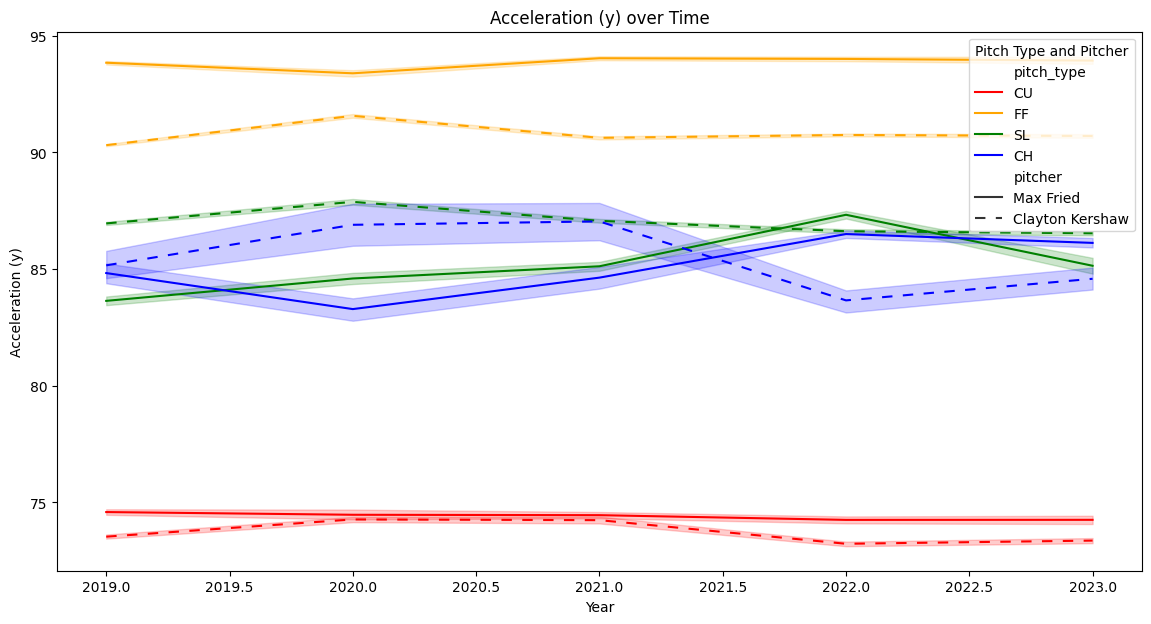

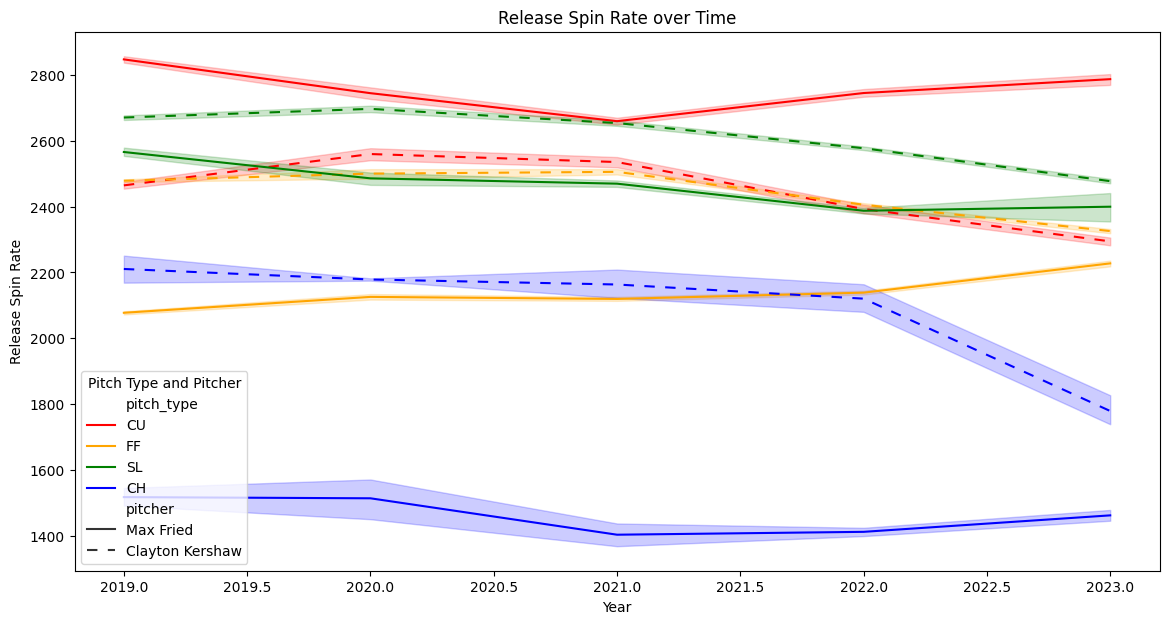

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert game_date to datetime
fried_data['game_date'] = pd.to_datetime(fried_data['game_date'])
kershaw_data['game_date'] = pd.to_datetime(kershaw_data['game_date'])

# Extract year
fried_data['year'] = fried_data['game_date'].dt.year
kershaw_data['year'] = kershaw_data['game_date'].dt.year

# Add a pitcher column to each dataset
fried_data['pitcher'] = 'Max Fried'
kershaw_data['pitcher'] = 'Clayton Kershaw'

# Combine the datasets
combined_data = pd.concat([fried_data, kershaw_data])

# Define the custom color palette
custom_palette = {
    'CH': 'blue',
    'FF': 'orange',
    'SL': 'green',
    'CU': 'red'
}

# Plot Release Speed over Time
plt.figure(figsize=(14, 7))
sns.lineplot(data=combined_data, x='year', y='release_speed', hue='pitch_type', style='pitcher',
             dashes={'Max Fried': '', 'Clayton Kershaw': (5, 5)}, palette=custom_palette)
plt.title('Release Speed over Time')
plt.xlabel('Year')
plt.ylabel('Release Speed')
plt.legend(title='Pitch Type and Pitcher')
plt.show()

# Plot PFX_X over Time
plt.figure(figsize=(14, 7))
sns.lineplot(data=combined_data, x='year', y='pfx_x', hue='pitch_type', style='pitcher',
             dashes={'Max Fried': '', 'Clayton Kershaw': (5, 5)}, palette=custom_palette)
plt.title('PFX_X over Time')
plt.xlabel('Year')
plt.ylabel('PFX_X')
plt.legend(title='Pitch Type and Pitcher')
plt.show()

# Plot PFX_Z over Time
plt.figure(figsize=(14, 7))
sns.lineplot(data=combined_data, x='year', y='pfx_z', hue='pitch_type', style='pitcher',
             dashes={'Max Fried': '', 'Clayton Kershaw': (5, 5)}, palette=custom_palette)
plt.title('PFX_Z over Time')
plt.xlabel('Year')
plt.ylabel('PFX_Z')
plt.legend(title='Pitch Type and Pitcher')
plt.show()

# Plot AX over Time
plt.figure(figsize=(14, 7))
sns.lineplot(data=combined_data, x='year', y='ax', hue='pitch_type', style='pitcher',
             dashes={'Max Fried': '', 'Clayton Kershaw': (5, 5)}, palette=custom_palette)
plt.title('Acceleration (x) over Time')
plt.xlabel('Year')
plt.ylabel('Acceleration (x)')
plt.legend(title='Pitch Type and Pitcher')
plt.show()

# Plot AY over Time
plt.figure(figsize=(14, 7))
sns.lineplot(data=combined_data, x='year', y='release_speed', hue='pitch_type', style='pitcher',
             dashes={'Max Fried': '', 'Clayton Kershaw': (5, 5)}, palette=custom_palette)
plt.title('Acceleration (y) over Time')
plt.xlabel('Year')
plt.ylabel('Acceleration (y)')
plt.legend(title='Pitch Type and Pitcher')
plt.show()

# Plot Release Spin Rate over Time
plt.figure(figsize=(14, 7))
sns.lineplot(data=combined_data, x='year', y='release_spin_rate', hue='pitch_type', style='pitcher',
             dashes={'Max Fried': '', 'Clayton Kershaw': (5, 5)}, palette=custom_palette)
plt.title('Release Spin Rate over Time')
plt.xlabel('Year')
plt.ylabel('Release Spin Rate')
plt.legend(title='Pitch Type and Pitcher')
plt.show()
